# **How to plot the map of India using Python**

> In this notebook, we will learn an easy way to plot state wise map of India. The python libraries required are :
1. pandas 
2. matplotlib
3. geopandas 

> We know that pandas and matplotlib are commmonly used python libraries for data analysis and plotting graphs. Now lets see what is *geopandas*? 

> **GeoPandas** is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by **'pandas'** to allow spatial operations on geometric types. Geometric operations are performed by **'shapely'**. Geopandas further depends on 'fiona' for file access and **'descartes'** and **'matplotlib'** for plotting. More details can be found [here](https://geopandas.org/)

> How to install geopandas : 
> pip install geopandas

> Don't forget to install all other dependencies required for geopandas!

> Now that we are all set one more thing that we require is a *shape file*. 
> > A **shapefile** is a simple, nontopological format for storing the geometric location and attribute information of geographic features. Geographic features in a shapefile can be represented by points, lines, or polygons (areas)

> > You can download the shape file to plot the map of India with state boundaries from [this link](https://map.igismap.com/share-map/export-layer/Indian_States/06409663226af2f3114485aa4e0a23b4)

> We are going to plot on the map - the number of **Paramedical Staffs** available at various district hospitals in India as of 31st March 2019. The data was collected from Open Goverment Data, India. Follow [this link](https://data.gov.in/) to know more.

# **1) Importing libraries**

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 

# **2) Reading data file**

In [2]:
df = pd.read_excel('../input/paramedical-staff-in-india/paramed/paramedical_staff.xlsx')
df.head()

,States,Staff
0,Andaman & Nicobar Island,62
1,Andhra Pradesh,1348
2,Arunanchal Pradesh,913
3,Assam,2818
4,Bihar,1916


# **3) Reading shape file**

In [3]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
shp_gdf.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


# **4) Merging data file and shape file based on names of Indian states**

In [4]:
merged = shp_gdf.set_index('st_nm').join(df.set_index('States'))
merged.head()

,geometry,Staff
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",62
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",913
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2818
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",1916
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",2267


# **5) Plotting map of India**

> Now we are going to plot a *choropleth map* to represent the number of paramedical staff in India.

> A **choropleth map** is a type of thematic map in which areas are shaded or patterned in proportion to a statistical variable that represents an aggregate summary of a geographic characteristic within each area, such as population density or per-capita income.

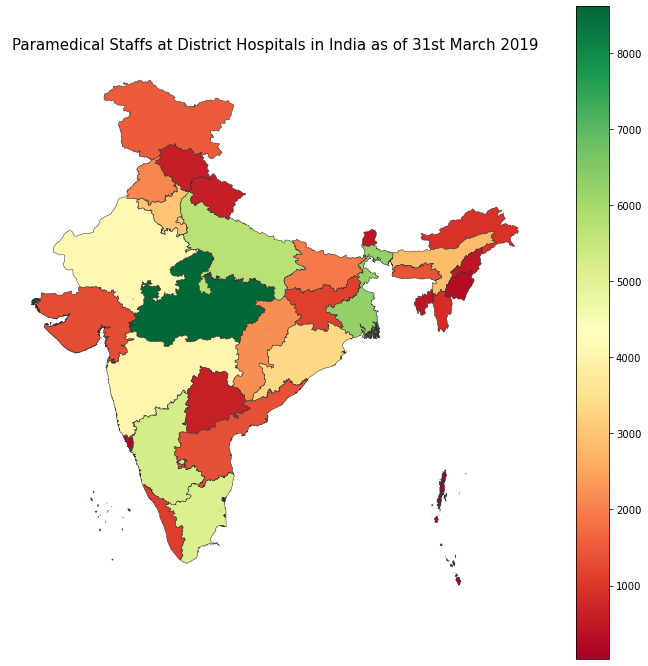

In [5]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Paramedical Staffs at District Hospitals in India as of 31st March 2019',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Staff', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

> Here we can see that the states in **red** have less number of staff and those in **green** have more number.